<h2 style="color:#0099e6;font-size:55px;font-family:Georgia;text-align:center;"><strong><b>Exploratory</b> <strong style="color:#fd1c20;font-size:50px;font-family:Georgia;"><b>Data</b> <strong style="color:#00e617;font-size:55px;font-family:Georgia;"><b>Analysis</b></strong></strong></strong></h2>

![](https://editor.analyticsvidhya.com/uploads/96756cover2.jpeg)

<h3 style="color:#0099e6;font-size:35px;font-family:Georgia;text-align:center;"><strong>Ab<strong style="color:#fd1c20;font-size:35px;font-family:Georgia;">str<strong style="color:#00e617;font-size:35px;font-family:Georgia;">act</strong></strong></strong></h3>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>Airline companies want to calculate flight prices. These methods take financial, marketing, and various social factors into account to predict flight prices.<br>
Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. Here we have flight tickets data for various airlines between March and June of 2019 and between various cities. Size of training set: 10683 records.<br><br>
</p>

<h3 style="color:#0099e6;font-size:35px;font-family:Georgia;text-align:center;"><strong><strong style="color:#fd1c20;font-size:35px;font-family:Georgia;">About <strong style="color:#00e617;font-size:35px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:35px;font-family:Georgia;">Dataset </strong></strong></strong></strong></h3>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>1.Airline:-</b> Name of the airline used for traveling.<br>
<b>2.Date_of_Journey:-</b> Date at which a person traveled.<br>
<b>3.Source:-</b> Starting location of flight.<br>
<b>4.Destination:-</b> Ending location of flight.<br>
<b>5.Route:-</b> This contains information on starting and ending location of the journey in the standard format used by airlines.<br>
<b>6.Dep_Time:-</b> Departure time of flight from starting location.<br>
<b>7.Arrival_Time:-</b> Arrival time of flight at destination.<br>
<b>8.Duration:-</b> Duration of flight in hours/minutes.<br>
<b>9.Total_Stops:-</b> Number of total stops flight took before landing at the destination.<br>
<b>10.Additional_Info:-</b> Shown any additional information about a flight.<br>
<b>11.Price:-</b> Price of the flight.<br>
    <br>
</p>

<h3 style="color:#0099e6;font-size:35px;font-family:Georgia;text-align:center;"><strong style="color:#fd1c20;font-size:35px;font-family:Georgia;">Table <strong style="color:#00e617;font-size:35px;font-family:Georgia;">Of <strong style="color:#0099e6;font-size:35px;font-family:Georgia;">The <strong style="color:#fd1c20;font-size:35px;font-family:Georgia;">Contents</strong></strong></strong></strong></strong></h3>

    
* [Importing The Libraries](#1)
* [Loading & Reading The Dataset](#2)
* [Meta Information Of The Dataset](#3)
* [Finding The NAN Values](#4)
* [Imputing Missing Values](#5)
* [Data Cleaning](#6)
* [Feature Generation](#7)
* [Droping The Redundant Features](#8)
* [Finding The Total Uniques Values In Each Colummn](#9)
* [Finding Duplicates & Deleting them](#10)
* [What all uniques values we have in every columns](#11)
* [Basics Statistics](#12)
* [EDA On Numerical Features](#13)
* [EDA On Categorical Features](#14)
* [Finding The Insights](#15)
* [Summary](#16)

In [1]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----#1e77b3
color_map = ['#fbff00', '#fbff00', '#fcff66','#fdff99', '#feffb3','#feffb3']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


<a id="1"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">1.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Importing <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Libraries </strong></strong></strong></p>


In [2]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Libraries to visualize the dataset
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Some more necessary libraries (These are for drawing the image on the bar charts)
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#Installing the openpyxl
!pip install openpyxl

<a id="2"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">2.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Loading <strong style="color:#00e617;font-size:25px;font-family:Georgia;">& <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Reading <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">The <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Dataset </strong></strong></strong></strong></strong></p>

In [5]:
df=pd.read_excel("D:\Flight_data.xlsx")
df.head(3).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

<a id="3"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">3.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Meta <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Infomation <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Of <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">The <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Dataset </strong></strong></strong></strong></strong></p>

In [6]:
#The shape of the dataset.....
df.shape

(10683, 11)

In [7]:
#The dimensions of the dataset.......
df.ndim

2

In [8]:
#The size of the dataset.......
df.size

117513

In [9]:
#The columns we have in the dataset.....
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
#index of the dataset
df.index

RangeIndex(start=0, stop=10683, step=1)

In [11]:
#The dtypes we have in the dataset.....
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
Number of variables = 11<br>
Number of rows = 10683<br>
Number of categorical type of feature = 10<br>
Number of numerical type of feature = 1<br>
<br></p>

<a id="4"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">4.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Finding <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">NAN <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Values</strong></strong></strong></strong></p>

In [13]:
#Finding the missing values....in the dataset...
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0.2,0.2,0.2),  figsize=(15, 6))

<AxesSubplot:>

In [14]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME..... Fetching The Columns Having More Than Zero% Missing Values .
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    data_type = df.dtypes
    return pd.concat([total, Percentage ,data_type], axis=1, keys=['Total', 'Percentage','data_type'])
missing_data(df)[missing_data(df)["Percentage"]!=0].style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

<a id="5"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">5.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Imputing <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Missing <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Values</strong></strong></strong></strong></p>

In [15]:
#FILL THE MISSING VALUES WITH THE MODE VALUES.. 
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

<a id="6"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">6.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Data <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Cleaning </strong></strong></p>

In [16]:
#REPLACING THE VALUES...
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4})

In [17]:
#CONVERT OBJECTS INTO datetime[ns]....
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

<a id="7"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">7.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Feature <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Generation </strong></strong>
</p>

In [18]:
#CREATING THREE MORE VARIABLES FROM THE EXISTING VARIABLES...
df[['Arrival_Time','Date','Month']]=df['Arrival_Time'].str.split(expand=True)
df.head(3).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

<a id="8"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">8.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Dropping <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Redundant <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Features</strong></strong></strong></strong></p>

In [19]:
# DROPING THE UNWANTED COLUMNS
df.drop(columns=["Date", "Month"],axis=1 ,inplace = True)

<a id="9"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">9.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Finding <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Total <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Unique <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Values </strong></strong></strong></strong></strong></p>

In [20]:
dict={}
for i in df.columns:
    dict[i]=df[i].value_counts().shape[0]
    
pd.DataFrame(dict,index=['Unique']).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

<a id="10"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">10.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Finding <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Duplicate <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Records <strong style="color:#00e617;font-size:25px;font-family:Georgia;">& <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Delete <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Them </strong></strong></strong></strong></strong></strong></strong></p>

In [21]:
#Finding the duplicates from dataset...
df.duplicated().sum()

222

In [22]:
#DROPPING THE DUPLICATE.... 
df.drop_duplicates(inplace=True)

In [23]:
#CHECKING THE DUPLICATE VALUES IF ANY...
df[df.duplicated()]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

<a id="11"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">11.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">What <strong style="color:#00e617;font-size:25px;font-family:Georgia;">All <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Unique <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Values <strong style="color:#00e617;font-size:25px;font-family:Georgia;">We <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Have </strong></strong></strong></strong></strong></strong></p>

In [24]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [25]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Airline', 'Source', 'Destination','Total_Stops'}}
multi_table([df_nunique['Airline'], df_nunique['Source'],df_nunique['Destination'],df_nunique['Total_Stops']])

In [26]:
df['Year'] =df['Date_of_Journey'].dt.year

<a id="12"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">12.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Basics <strong style="color:#00e617;font-size:25px;font-family:Georgia;">Statistics </strong></strong></p>

In [27]:
# Statistics on Numerical data......
round(df.describe(exclude = ['object',"datetime64[ns]"]), 2).T.style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

In [28]:
# Statistics on Categorical data
round(df.describe(exclude = ["datetime64[ns]",'float', 'int64']),2).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

In [29]:
# Statistics on Time series data......
round(df.describe(exclude = ["object",'float', 'int64']),2).T.style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

<a id="13"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">13.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">EDA <strong style="color:#00e617;font-size:25px;font-family:Georgia;">On <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Numerical <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Features</strong></strong></strong></strong></p>

In [30]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
print('Numberical Variables Column: ',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head().style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

Number of numerical variables:  4


Numberical Variables Column:  ['Date_of_Journey', 'Total_Stops', 'Price', 'Year']




In [48]:
fig = px.histogram(df,x='Total_Stops',title="Distribution Of The Total Stops",color_discrete_sequence=['#f7f7f7'],marginal="box",template ="plotly_dark")
# Add image
fig.add_layout_image(source="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEz-KGmbgg6FLLUUXaUr5M9VyTLpiSz3ksTbtrEXJBmdo-k8uIVkknCnNaQqzOmKfYSAY&usqp=CAU",
        xref="paper", yref="paper",
        x=0.36, y=0.77,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")


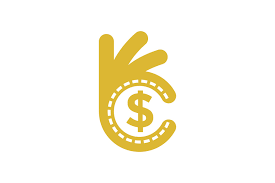

In [32]:
fig = px.histogram(df,x='Price',title="Distribution Of The Price",color_discrete_sequence=['#f7f7f7'],marginal="box",template ="plotly_dark")
# Add image
fig.add_layout_image(source="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAAC3CAMAAAAGjUrGAAAAulBMVEX////ctzP69+v///3asxz//v/ctjD///zbuDLctzXdtjTcti/btSneuz/auDTbtCXmzoLctCzatibcsyTdtTfYsxX++fHewFDz6Mrfwl3r26DbsRz58t/YuCv18dny6MTix3Du37Do2JXu5Lf49OTlzn/t3qnfukbgxFXjw2DbvD338tbbsgbq3Jz27Mzr1JDhx2niznjbv0jivlnk0obpyn/66svr05XeyWvq3aTmyHTu2qriu07v5bWoEgUdAAANS0lEQVR4nO1dC3vaOBaVsJD1soVtjAMGDIFAAhkgaWeZTtv//7dW8gNsQzqbbttMFZ22KUROPutwdV+6ugbAwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC4t8GR+Gt78Hi3wzHBWB8vPeS3hYA1wqLhtt1e7HEhIePw+Vb38wvgdNtvLsYVv8G9xEkPoSQCry8co15UCtj/kADb3aTv27DAYNNACuQZ/AOVK0DthsUcIh5Ouxcu2CKA3LmJFq9BzmZRhxSov5A4Q1aY10XjAmHZ1AxfJOb/LVw2FkKokNr0AXTEMMGwivryyw4YCTZecLxtr4ylPodR7xJCXzsmr92krMChSTo1ThRlCwnpEUJjI2XE7cjarPu86ShQTs+blOirui++NsMQQfVZ4y9EyfKex2sRZsSP/rDfLvzMieOk0S0zQmcuO+YEwD+alOiLFS8A+br2Jc52SPYBpNb86XkRU4csLikBPvjPEg2HS9w4k7TNiNU+O8jKn6Rk/6FYyKeB+9BSMB1TlTkO4tanJDgedDwcd0yPjYwyXRdTubppN9cOMGm01Cvmrqb+WpxNZT+zXHJiY5yEPZb6nXSKRMnTrerXzi7O4EiGcWz5bWsy2+NK3LigIQ1GaEsHFdSkjMy3U9Q6eOKdPe2M/jxuCIn4Fa21CuXu5owdD4nsYC0UjgkHb/h/f8MXJGTthn2GVrk1+plBaZ3IWrkD5hIDMvRXuFk3UqZ+OhYSIn6kg2RaHn8FMbTt57Fj8UFJ2DVXjlyppWIViOLNQowbXFCaHA0XE46IW+aYe653dylX3hpO+lWQNy99Sx+LC44eQr85szRON8DUowQcpFiKjjpvfUsfixanKzH7dAvnWs9sh3G1/nQkLdvPYsfizYnh1ZqLdCp/METmrRcloYkbc3KRzY5gYw3NSgmA+Xpi6APL1Nu1SWTB7NUbJuTFmicgc4wvYiR6/AN99naEDPwNbxubArOiC+R4b59G0Hnb/QNRaKc/uhpadjK+QdO+MckIP5Lo1ii4byTB41m4dtygjGB12ww8UkQb1ZF8sQ0Sv6Bk5dAI3lnWJBTw6s5YdAnaL3KqzKMk5ACr+aE8PRD5pjlpLXwWk44Gm6B4fVbr+REPGwNNDQtvI4TvJ5v2/Vd5uGVcsLCFK2P23x/561v/afhO2wxl4jcmhbj1PF9/ony2IbZ1XJaE/B9nOhsfZRkhlYZfC8nUJvlezNX0P/BiZIVtDexlOt/4gRzoSJBznk7HpzItYGi8k1OCKM+jFLhDe88gg+zhEZ6D5DiKqfCKI/nxvn53+KE9UOGw/lYK9IDRzfKK1lmBw5Fo2An3pumar/BCU7D/YaiIicwE1J5akp5PAlxeE5r2X2GDob5by9ywtB67oJ9JP4AYDDdHXDwaaclxtN1BLsHxM/5N3nvGBUVvsQJ9hZaKsYSJwcYI9QnFKUIfXgS7F6bmunwrG9ZNDRq8bzACQk+6pmP90IZHaJzjT6HtA/VV36fabYcnc6nhbCw8GCSor3GCRY+zlfIEEU+xFKmgtK1B8M4FYxAnvpzB+yFLwJS7YRFJm0ZX+MknbkzzIcHhAmRKDlmyyLTOFgu9utYYsqR9zlkaLE6VUf6j3NznLcrnER7pVXXnAs2QZtV2ydbjjykhSevJsii0+4PmhrMiRypT7zzQekU9CXLjwTW4Oqyi+wLUgpWLpQOmU4qVYvX5nIi9cHQreAkYPN2lwLHKd/PQ97HaKTPC578t+jWlNVzwYnoOSBDWqkMavmRwXGkcJ5056AuQR/Vi+dy9WAfLQ2xyA1OlNEVUM4WCOowpspFO4qb5aOUMjyJjfo6SrmfflxCQXjOCmHi/k1n8uPQ4ISSdQ8xISCXN+dLdJWwvgwHZTlogQXCNAgZCT5Ujr4pFQZNTuItmE8YxKix8TnIRjM9bzbKTuX1KuzLEPMJoTvHK6sxgtkvv/2fggYnUoW44D7wH6sPXC+V8QxJWYiCRDJZOaec/SKmOFKR4Q4VxocTMxRKnRNMXReMIhZ/rkbV/HuPjdpQFqFjeWhF6ZTYz0/f/lnaHmTGKY0zJ4zIOeiOIxKey10d9zmC9aIcCilDfllq3gWHkKSf1C8p/dnANE4g0fV8hxDy2uGlhxBegAanPg6dFMJY/dQ+1yjUf5s5/GjU5MRnYpSlFC3OyZDqoGQgcSkmGnElDg6YI6WEBrfFefXQkEDwzInyM7iU9cP3Lkgw0Z4HGn5dqxfeRIXJHAanEmFF3ZoxPJEFX8iQM5RnTvjDRtsPlJ3d12Wc65JwBMCGMeXhLhLkM+LW/P1pzHGug6n29c1w7k+csHgKtgkh69OQ8vFzASCJYmnNi7L6xfpxUe99Af4jIsIoIVxRYhonfKPEY0OCT6eh6ty10OXlXnHUQPn5q8bElYv7UcQoih/MqW87caIPnIzRWX/mclIMJuqNxzQnjjbADcdMdy9wx5muSjFDSECNk+grACOJk/NQt+IkVEp1gwtO3gNOnGijcRDieB7qusWg34+Gu7WKew0xtf+IihOfL5YDD6dZYzQpc9Bc8lKfvAdJqTghfowmHLbyQllcc+wx7WWuSXsWL6HihHEcTCgMB01BaPSFIQKx26XpwuJ0O+UpUerN7tcY85Yade5R4wwCRWLvGt4qx6nkhOc7E5w2OXFdcJuKetUJZaE3NXsBnTjJd2sQ9tp1e12wvJPNxnVcGliHU4MzqDhRLtsNwrTNidPtgsHi0DiuzzZvc7O/CO6gTJDwGXAUJ+TyijzR6Hra8JTiQiKDNkIv4bjlOWo+VDEugmHnhcl6OnA+lN0b+LOppbEgD1G8ghO8HmxXEqbtXd/qbREDbstmh/Il6szAEOafPSMhUma57OpRQa2bMkdfxsVTdAoEDMadKLbxKONCtNOHzvRQxslVrsDPfThkTmLgGj5FpTEhw9FdUEsp5er1OSJZLi4FJw7Y5JzENWtcbZca5MjdoGL7hitjvEWkNltX9zekOD7ogsdSTraFUW5u5ExXo9XWpJNOg7iIaLDnOq7yUvencMZRfFFCWICG86WX508yQnKROuexHbBbIxQqZfSHQVklr9zE0x2AegHljlvZ2cGm9OpxFIZ9ZZpIsQlKUa15+QgRukEBI9HB7ZpiofdVU7GjNisMnf2x0eOpt1ZezHd657kn5bFIqZKQ7MApjO6MEZRtFQWK3FvBxD2tnTkPWbvHB/NheNI5rhsyIjvaekFzai2UvSj9MIrmK1/Z5WhUjajVs49lmxTExqdexGAv+9p8d/Lck4oPzICaV9W5XEr1oav/qp59uv6mM6LoVFzfp0KiXgdUdQW5C4eUT3vMH5WADam10PXjcaUoqEzmkorEPedH1KvtMeG5E9OPwy+jc2sPx3HXRKshZ1CkKFlsRl2BJmVYCYJY6dVAxV0tvZi/cHda6ZCp3sUpzJLe1gGzUBvmkZK0gtXInLPHWZUdkZ/UlDeY6J3f5jLI69lYY1PUzTtWC4yD57KxKqGGrB39eT+XiRGmY7tx3CeonSDJOYG1b3Z1VpJB9OlvQUhZyGRU7zolKIV14YnSq5lSHult0yvtxNo9qT0QwAG3EWRS2ZwRr55CYlBkqGgYnqbVA+4wf/HUWAfLx1jhzAlwZyjvBKkCpmrlCXN8Nq1Pz9375DERTAgV5Wy2eqRkxhlo5JrX1apm1w+gHz2p4XFcdJIlRA7M2vg5RhUpQvTRzY3kTMS9AXAvdi0cpUk6d4joYz4dFyyrBn+slY767eE6yWkTh00ypWjXysyKcH/N4VjuZehTjghbu2NelUWK2a++6Z+OztlxC3V5rNvTCX0ZzrLc5+hWDRsGiwOSyilByU4/yKoqoYaMGZiizU4qpY96OkF04JCTPkfofp/dLJU2We4W+w9xpHOVYbBSPxH6p+desdjIJ2koDyyfoZqyTJaaI/8+lVStEhXkxChVf6OQ6L5bvD9yldi4CSaFT08g+mrgfqkyJk/pKQTm6PNzoALk3Qw1G2CyIES4P9EyceNF1fY6SY05z1SHzjT/FZ0nLzEU+ntu9oy5RDI/hiDQ+mneOUyiT2A5S6vnAlAcfTS1/sJxZvXCCrwuOuFggrfZfLXai6iXm6EswuuP5wQCIYoSU6E+6l7j1FfkHZf6kYpF//ppiovHB3YiSIIzeUwtHMMaFpzgaIs7imsNhSkR8ZcHLv7Ox5cIfgHudjWMGaS0qukiLP5q6sIp4IIb5dfXs41cOWX+w91xtDoKCpMYoWZfmMAfG7yfDvIjTGAwTEmjjS7V8hKGUuiHkmrhOYtIn6cqVDRaSkqsgiuHdq6g74f97EpEZCAc0PkTXTws8QoEOqoY2VT12oCe43iWcvKNRtTYJxLdGdpm+Cr0FueyJ8IXhQWTlB87wDVaubaQqwhXR8BCBzh6a5QxpsIhyigUAolZVu3wvDt0sp4Xp1II/fBagrEKBqM02WfmbFm8FoWNHWznx7uHxPO85OHP43zq5iPvadVYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWPy++C8A8sYjjrlGrgAAAABJRU5ErkJggg==",
        xref="paper", yref="paper",
        x=1.07, y=1.25,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

<a id="14"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">14.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">EDA <strong style="color:#00e617;font-size:25px;font-family:Georgia;">On <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Categorical <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Features </strong></strong></strong></strong></p>

In [33]:
# list of Categorical variables............
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (df[feature].dtypes != 'datetime64[ns]'))]

print('Number of categorical variables: ', len(cat_features))
print('\n')
print('Categorical variables columns are: ',cat_features)
print('\n')
# visualise the numerical variables........
df[cat_features].head().style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

Number of categorical variables:  8


Categorical variables columns are:  ['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info']





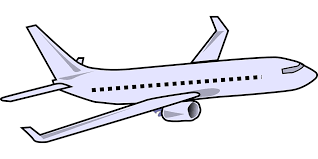

In [34]:
fig = px.histogram(df,x='Airline',title="Distribution Of The Airline",color_discrete_sequence=['#ffffff'],template ="plotly_dark",width = 1800)
# Add image
fig.add_layout_image(source="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAACfCAMAAABX0UX9AAABEVBMVEX////k5P8AAADm5v+lpbno6P/q6v/v7//u7v/x8f/s7P/09P+goLSfn7P19f+xscb39/eFhYWkpKTq6urZ2dnZ2efBwcG6utDLy8u2trZ0dHTJydfi4uJ/f39vb2/k5PZdXV2SkpKtra0kJCSamppPT0+4uLjPz89FRUWwsLoxMTHc3Ny+vsnOzuPd3ezn5+dJSUl1dXyNjZTZ2fAaGhqpqbA8PDzExNGHh41oaHBPT1ZZWV7S0unCwtcXFx+bm6NiYmmLi5x9fYwQEBBAQEgyMjcAAA10dIFUVF42NjkTExlISFGFhZUpKUAnJyxzc7M2NjM3N0AWFiNKSnNnZ59TU4Fqaq2Hh6FcXJp2dpkLCxulUrBGAAAVbElEQVR4nO1de1/aXLMtE3LljkaUCAFBJRioEBBQKShab31pfS897znf/4OcmZ0EiGAriIZW1h/l9zy1sLOYy5rZs7efPq2xxhprrLHGGmusscYaa6yxxhprrLHGGm+IuAu/F/JnYg8cJPxeyZ8JgA5hCFt+r+SPRAJaIVmWVYANv5fyJ2IXTuVAICAYcOL3Uv5IlKDKIX9ybR3+FsEB1AWkLyBdr8PfIgAg7w1w6/C3EBJgkveuQviLH+1l93xew7zA5BEi+nwOf/HDYm5ACjTp3xoWgpM8/Ax/m4kSMXdda2oNyPuzhkWByUMJ+Bv+dgFO62ZVknheL/xpEsBJHoGA4lv4S0BT5pgPcHoZMv4sYkG4ycPH8BcH0O0lIH8nkPVlEQtilDwCnG/hLwltyeVPOYacL4tYEGVQBQR5D4Y/f5pXuAbO5U86g31fFrEQ9uC6m4rFguEUfvNQ9mcRW9AXHfYsTu7AyZ/SgjwCiAURkYoQ4A0o+rSMfdB4h79zDoNw+c/gL+6wF7Zw9eIZ7Pq0jk04kV3vrfByGxp/RA25D70YYw9DD1eFkm8LyYIhuPx1ebkOvn2TcyAPna7LXkDogX815wY0FJc+5E/sAWz6tpgXYgsKahjjHmMvIF/52XXJQ2/En5USRANg27/VvAQbADZ7vFO15XxcTHwAOjfBn2QCHPi4nt+jACYGvsi5nfOEur/L3YOaq50x/aYEQVvtBkwW2lYYFYujGOShT5rZxd1YOwf4CvKHKt4vIfV7JKEkR4KRrpPwOA3S/i5oG85El76A0E0JvD5Y2QbCJoCItYbLXkDJ+B6qc9Dix/ylUgI1YFazgYB6WauEwymXvYAIA7/XtAtlOTDmL4b8KaXVLIBL0OQjE+zx5go0KjPQFCb4CyJ/ch9+rF4Bl4FONBiOjRcrdVZApqJLSGP6Ajx9vaH06hVwO+gm3cgEewEFCn4vClF0tw6c8iOC/K1eAbcLULU87PnYbPGg4e5cTfK3agVIA0wpGBtnORR9Z/DZ71URDqAzkT2w/CD+qADZ8XtlY+SgHuoGJ9njdB+bLR6cgDZhfgH+nPijAmQlnINQhNOQ5WEvwPvZbPHgEMW8Z2UVCjJ8deC3qHexDQOF97IXkB99LtjGyIHpWZvAUhwn3a2GAKQ2i9D1sudzs8WDz9DwmB+WH4w/jM6FFRAwJ2AoFsd5V1hfofm0BPQE7+piYUpzocwKCJg01OSAlzxc2Rfwe11jPNHOFP+C4SDPBeQm+P0t7423ZCZ81/dmiwcTm+bO+rhgMIgOQwLG1w7gEYxbumMo7dWSpQWPdib+9DDjjzqAPn7R8cFkS2gEGV7quxu7m4fbWzvJYj6fyGTS6XSieHC49IC+Bf0nLoLyme1n8foJlEgjHDUKiMH7iul96EnT7P2q2bKxe7h9kMxn0rlSAZ7FcWJnqUH92KudA0w+s71oTs6yLThnMe/a5chPf6scz/PRDhxN/NTG5vbWXjGRzp00vCQNrk87tXa+2DRSrZamaSpCazXbHftZssmjZz95TmzCXejpd1yJ2Lsycg8ruAy0P4XQGt5TrG5BwWlnEGmCJMuirplGPg3lT0eHW3v5TPbYa2LDh067XjS6SJUuhqKhkKgIAs95IYhRQWvWbAr3lmOFWTCeBhmhG2aTJAGphR9E51Het9D8DFAVBAVZE1TT6CU6D/cz/LBwetMuNk0iTA4xvhyWpp1+0op5KaQaNTaenD54vU1swNepKCOkwvbODK8fw7UmcpV33QgpQ90M1tP96ynKGlf9yzxRVlVCIVly7euXhM2gkGMUMiN8dSKf2DQf8xcLB8MptEqOWoBZ3Xi3Ov3z4XbuCWeDO5szdMtoSHaMbE7GZlEoa70hQPm1OXGWwuJpniRGq5S0E4CTty1CMAfsFDPZ/Yl4NijfXtZ7hqZWpdDSOHtKoRDS8KPKr8uKe1ATp96Z5HMwaDEDbGJiyyy9R4mcHRQT2Vx5wtDKpzfEmVYVxr65ZM4mH5LH5BjBMPg615oYOJ3gL0yjiGxzVRCbaOW5ZVRx8SMUZyQ1Bp4cwJImpYC358xlTpAk3ezARSrVx2d7jQFu26c9n3yAFR45cIAXzRJLVQvZYHwX9VneK88KpQ7mzZbNmfg+nE0wVzXqZ19RVQRTsVRneIYEviI6PW38MZB8dh0Y/0vW2sxi9tNY/byAxfjuIeNsogb4Wjjpf8MkUFF1KSTLCv8WAe3X1JHNIXO4mKubi2AqFYulbkENaadoGwuXdLtQmDY/lM9hNkvc5e2DIJKo9TouGY3jbKa4s3W4ubvhXtOwsXFEZSaJ2skk0Dg5u6wTZyg25DdKAi8Ep/VyX4m5SIyYQ6Qig2GVKizzDhY/ZuXdNHdB8o8cOGg5j8vxoqyrrWb95vgXdSXj7MfZjZ04BVl+r4D2WwhtcGzORip2C22JrYuXjQY0FlSB040/Bjv9BiOx0ZNj6cmRC8hIY0UzkvX65U3/jKHfuflW7zUNFGjVd0wC84A37ruxEVLBWzhTR8/NK21YtDooQntKOxNZqXA4mHJmOrH+5M4r59boL/H/YGklyi6kUZ35LmTMD04Foo0hdnEFZ5o8uVRJvVt0l2IwqzuJXwkjjf1hdVOp7tO9hz8MOlxcXHZur4b3X2DQVuUnD8PJ7QVPKz3ZNB+/I2OukkIJU0HH/aPJY0eBC5jJMMQYFUmZ8TCooxcb0zuZavy5zMXCkUjsnBNWnjr7y+UxnnAstsz4CR0zmaiwEDP7PaIL7kVtwtW48ecw140FI+HwinNHEZheJUWnjQclXK/toyXI9RlaYmrnbgrR4YJbeY52tpk7Z8wx1dK1Vow723I4SZJJc3Ca2ezhwpWHL0DFZwgFHD2JEJ6RC3//3gtvw2/AvYxLGzPHyKvw/IqQx2OaD5D/6VUasedr/f0rTHc6yUw0O5laDy18xRKWOsB8faoP8ntw8t3CW3nU+LNikciIu0is4iN3jgDiSXVTCW40e20RX4kuKTCiTXrE1wrStm/TJt3gK5oj356lZH8N6g4vtr34OZktU+PPThaxYDCWqljvTJ5dG6KUJCvjq5bWwnKqsl+6fpBpgxwRpeFSYA1KCX2VnFWmXobJ0SFL2+qMi56BdAbmX7yiNhYdj98G+LJf1zg7+Ak8E8BLJ2gGOFbIYEElKzqygmXpRa0nBDgD2TiTbNq+hGiuD9hdECLYtDGrw/VKteNcDV85q1rVKXjjyhf72mm0YuHZPLiPvlMPxNEXWK4wp6yYTXx6oXc9hG9KgMdngJxD24PIbh0BCLEdcmZ1+PpliPQJRtNkUkuRJcnOea9auaB3XjOYkgVVrFZMwzBVRXoDBklfsKfVqyq+8LHLfslAFjLICmoMRlsNaTOpKebQ9kV0rA6zgLyfbfd0ljrs9fHLdA9Oxs89fsUUwh6Uh24rs916PYOuMUgy0xd8y2jWKVR1vgLEUFek8YOKPB3NBWZ1zFmRrgq+XktE3/BhX6Eyv3XOBkkkLKmZYln+d8uJ6tkrZno2tjLUCh3m2pFms5e9BxjUNHHGjMlvVkF/UBeBIigaGfmWUts/uSc5VrblmEL7g00uwOcdqyPa+rJtdSV8tdIXTdp55nRFZNLj+QphSeAUHUvd/cU2cza2EvRkX2qGLlE5wwui0mqjId41lVlV4dSHOypWxtBPVtbs1W/Qx/T72XJMSNhWx5PV3aDVmcPTHB2RsDSLUgc+DK7hTel6sn5Jr6PDLRL1kDrS6HDW0zD8jo748nK0SuoJMtYs/my6BAzZ9KpivFTQaH6Uh/fKhBy7fiLHLh055lgdV8G6ncwTU4gk2G/7/hoTH1VFdxjM77dI3YlLnShMUCdVmh3a07nv97RpM0B9Ua2STKhf9jsTckx4Ro4xq2tSjMPQT5cooY0xuviX6gvWV0QhJSw1V9D7CnK1eYWWNy958e08o26/pyke6hSt1yfqvmSbqiTNqHU5c3APtzPkmPREjqHVDR+RLr6LqZyiooCh32m7vvwBkTXOsipduv4mlupWltNuZNNCsq716Cuec//Vpe603hpTR98EUnfGEm/fsGZSx36QaLuSHTkWHcsx8atNm9LO1Gk8kOMliSWfhWyGiLPrn2CYEHTKSKzBF+ePDVlJckhQNaPeYbvz+8l5tEr8MF9yqNOlCepC+E2c0l+UM6gnGjVNfq7JMiXHQvB4m0Nv5k0M/UzXUTdt4Udk27CC3Ssb0zaByKw21O9Ioxm3kFhVu83e5Zk71bCf2JqnsbxZpCgOD3VTFz3UterH9Bd3mS36KuJJfP9hryrPTH+21Sm0aRUxDCbHREniAq8W/Xb1JsmK1Q1+u+n3by6CsWny7Lmll5KmyHJIQf1koBg4LYzmGkrZ/M72XAr5KMnGlq7aHuqUkG7Wr+gvTjzfxGGWLNRQxFn92gpvS2phefqCPWlIV83eTWlieOMhMs1e7BefydmciXJI1mmYtNjuTM41/Milizvbu/NuZezuZWlN1xlDFxX39iqkrmq2mWo5zm9PvWV8jwyy1pKnld8ysx+L4SFFbSXbZ+6DXmXbQUPTzDrmoCf8hUe3QXgYs30zJKCdmcTZhKFBo5RL5/e2FhwK3zhIN2xNXEXqOOcjJaLODp0zqHPwOY//ctDWQm/Saybi0OA0I99xY9FpumdoTAVStuGVTz3oeKJesMvxro0JZGQhCa2MUXZzWp4wWyjvZzPFg+3N1wyPYoplK0MNIk9Spxo1NiKQKx7+5h0OqZwf9tTQUvt+LnH124Zrb3VDE1jJM9JQiqyhnL0YZdxwrGth9UxuqWpdI1m/7HgZg8JxNp1PImfLOH2wsceCHWpi2S0nOF4k6tiac8kXTmRtURi8WxaDaFMhSTXrt86D32aaZhXThTdXE3dsHOlbMJhKpbqaVkXOzB7amHc0pHGSy2aWRtkEecTdYxuF3Yg6WVabHZiLOhvxHXqzq9cySDmextrvRsS1dBpMe/qmNDPLuKsZqqVRAri8nRigJLckwg533/DM4g84bVZd7UbUaQ512b1FTjTYDF4jgwvGQU6Iqmab5Xh4TPdM3Z7om6ZYVkw2sT3o5y8fxlmzzOL/5nsdwh9AU9VlNkcti1iHsRWlX3OSIc6CwbCOsWDe1MvxoWqdtRIfM4YmYhyeacb4LetGZ9I3B6VsIrl1OLfUeDU27c9/7LfztyxIpHde/83FDygOQseojubbX8YdleUYhVuK/Gw9wvHRavN0MqzlfT1QnMzkTpyMlDlY3kq2MnauvK3RSYEqGrg0i0f3GA8fVXvE3UNTEp+PnOTavUeHt+FtLVNj7uL/lW7x3eUfInQKGAcPNwniUYyiRdLZnigiRNsZGPW7RpGafqdNfXYBaHOnRDXm2qf0PuwQgiJdXpo9WJ1T90sHDS4nE9mTMY/Dh9vbh8fhF/DijLh7zu4wVYh2qugb+GO8exv8w9VtJybvr86NHm+Hz5vIY/p4nCUb5VIuY/N6Zii/4I4P6Qbz0prpcW3l6vq0f3MZEV98dvevwChB7hZ/MIP6FXeCExW/1LWQt66W+4UrpO/bRXeVbn14L2wmWHo2pefjHYW7Nu0kPfTU6FMlKRhwfXWL9EWC2speyPhGOEzYzoiqOGDNpo53lXHH0GfVMcqggfR1iL7VuCrtvcAaDDZ31rk1axCRiUC2IfAPMEIzZSNnwvD64bZzeREJip3VuOzrHbDNuMu0QrJwXqlYMxyXF6IaU3f//Ne/v/8LtNlxkW+O6IsFkh8j+G3RwAW0WyFROO92Z4y1cbwkmm3aTPrHf75///nz+z9B6J5z9q/e8P6kBsNHRl84ZjU/AH2spTVoa1GRq6RS1gxGqJhlCiW9Ffz5/ef/mEcGFORIOBKOEYeeIQxOv0f6ULcQfbUVuGXzLWGXwY26FpW5bix1Ps0dL8i2QikkWHPW/G/k0yfjJ9yKEaf/HkQOLX50AknuD23dEozpg79Z+MUP7CaMGhUD3WBsegiatnpbbapDjpOjZs/h0afD//4bakpkcg8jjCTa55WE3hemWy6CKePvFS52C3CIwk2yurR5/VS/cYLbf8o+va/if79/h6uodxsoHIkEUxUW/O4d3WKd+n8N2ZvAbv7dIXeKlYrM4I5X0GVPxy7rwcZ/f/78P5AmqAu7QZD+rUQV783FxXnrr+wZbOzRbvsVcsefxyLTpz5sl6UeSik523qM4GYSeuywNQ0SpCoWNxE0+dY1WV9Fv4el3fWzKthIHrP2XTXKVWKRcPdpouUEUTeytsv+slUGUO3aMz9TXXupd9WJ6L1VaPgtFZ+TJbt9F8VUEYmgSPEmC04RXZf97dGSLfiqhqaYc+5KskLqNQxW+zeIzIndIjWhbg09ahF3sXNvokWXVVyXfZHPJbG+0xSJJmQkBV/phdctS+d01cSU4/+19MvDbv4Ha9/pIStFxyufJIuxy+Z2Xtzd3qY926/D01w2m01nc7dut57h5O/Ry5tsWIH6weczuVOkkcvOtye2nSmVx23WQfk4l02nkczMfBvRq4zNRIG17xSpQqfdniRayrLmPC47jfjGZ8LGqlzGvEQcMu5qpiJ0Mc0Sd5Oxnrls/wVZ9kPiMEMTVrWWonfpTDRdCDGRLDgJXZZETHmGMP7w2KZjMvc1TdJTxF04ds6NueN4UTFr5LL7zwjjvxLx+OfDrZ1k4jeaIL5N7btGW5MsuoYkHPYkC3TZapNcdvChXDaem5i4eb4HHmftu2FbU85jDneB8ckFTlK0Omnncv6juWwcI9XNRc8wrfZzBy/t9t11XdMrxJ33HgN0Wd112Y+yBeFBFo4lOrFLv5Ny+rYru31311NZqiDuKFmM6zF7k6eRnmua/69CAhoqzVYragFyHhbs9h1yV+0G7fszUqOqjOoxrU4l20n+r9GzC6EIoLHzZHofCiOdaw/ylpC7lM3dRKKljQqTDfTm9j6ky3qwB9Bit3nQhbjsyli7fXfcU9VU2OFulCyohfLhXdaDLYc/9isREnb77rSp2qnCHv63uSNxp9VpErlU/Ngu68G2y59Qtc+jNjVtzJ2zR8s2Kmr3zGU/kLh7CQ5d/jil9vgtZYc7N9HatxuJao88upCZs4XyIbDt5A/MwPxosyZlJwvMFEKLHTg6Lv51Ow1Lwha4v+OEs5xkYXMnyFWnhfLyrucHxB7cOfc7cZbDHcdctmS3UNYu+2tkoObM1nF01ZMt7gofrYWyOE7gwaiO7my167FBdi3uXog4G+05Oe33z/Z/FNb12NzYLebc44mFtbhbDOyudL8XscYaa6yxxhprrLHGGmusscYaa6yxxhpr/Ar/D147ZVdRNnWNAAAAAElFTkSuQmCC",
        xref="paper", yref="paper",
        x=0.24, y=0.9,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

In [35]:
fig = px.histogram(df,x='Source',title="Distribution Of The Source",color_discrete_sequence=['#c0d1e4'],template ="plotly_dark")
# Add image
fig.add_layout_image(source="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQad_tDP05MSBMiVCL82KTTg8VDOe26Y0oDnw&usqp=CAU",xref="paper", yref="paper",
        x=0.538, y=0.87,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

In [36]:
fig = px.histogram(df,x='Destination',title="Distribution Of The Destination",color_discrete_sequence=['#ffffff'],template ="plotly_dark")
# Add image
fig.add_layout_image(source="https://st3.depositphotos.com/1921043/18483/v/600/depositphotos_184839970-stock-illustration-kochi-india-city-skyline-with.jpg",xref="paper", yref="paper",
        x=0.45, y=0.92,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

<a id="15"></a>
<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">15.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Finding <strong style="color:#00e617;font-size:25px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:25px;font-family:Georgia;">Insights </strong></strong></strong></p>

In [37]:
vc = df['Airline'].value_counts().to_frame().reset_index().head(5)
fig = px.bar(x=vc["Airline"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 5 Airlines", xaxis_title="Number Of Airline", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 5 airlines are <b>Jet airways,Indigo, AirIndia, Multiple Carriers, Spicejet.</b><br>
    <br></p>

In [38]:
vc = df['Source'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Source"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Source Of The Flights ", xaxis_title="Number Of Source", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that, top 3 sources of the flights are <b>Delhi, Kolkata, Banglore.</b><br>
    <br></p>

In [39]:
vc = df['Destination'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Destination"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Destination Of The Flights ", xaxis_title="Number Of Destination", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 3 destination of the flights are <b>Cochin, Banglore, Delhi.</b><br>
    <br></p>

In [40]:
vc = df['Route'].value_counts().to_frame().reset_index().head(5)
fig = px.bar(x=vc["Route"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 5 Flight Routes", xaxis_title="Number Of Routes", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 5 Flight routes are <br><b>
    1.DEL → BOM → COK.<br>
    2.BLR → DEL<br>
    3.CCU → BOM → BLR.<br>
    4.CCU → BLR.<br>
    5.BOM → HYD.
    </b><br>
    <br></p>

In [41]:
vc = df['Additional_Info'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Additional_Info"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Additional informations ", xaxis_title="Number Of Additional_Info", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 3 Additional info are<br>
    <b>1.No info.<br>
    2.In-flight meal not included.<br>
    3.No check-in baggage included.<br></b>
    <br></p>

In [42]:
vc = df['Total_Stops'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Total_Stops"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Flights Stop", xaxis_title="Number Of Total_Stops", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 3 Flights stop are <b>0, 1, 2.</b><br>
    <br></p>

In [43]:
top_highest_price = df.sort_values("Price", ascending = False).reset_index().head(20)
top_highest_price

index               Airline Date_of_Journey    Source Destination  \
0    2924  Jet Airways Business      2019-01-03  Banglore   New Delhi   
1    5372  Jet Airways Business      2019-01-03  Banglore   New Delhi   
2   10364  Jet Airways Business      2019-01-03  Banglore   New Delhi   
3    5439           Jet Airways      2019-01-03  Banglore   New Delhi   
4    1478           Jet Airways      2019-03-18  Banglore   New Delhi   
5    2618           Jet Airways      2019-03-18  Banglore   New Delhi   
6    9715  Jet Airways Business      2019-06-03     Delhi      Cochin   
7     657  Jet Airways Business      2019-01-03  Banglore   New Delhi   
8    7351  Jet Airways Business      2019-03-03     Delhi      Cochin   
9     396     Multiple carriers      2019-01-03     Delhi      Cochin   
10   5719           Jet Airways      2019-01-03  Banglore   New Delhi   
11   2099           Jet Airways      2019-01-03  Banglore   New Delhi   
12   2693           Jet Airways      2019-01-03  Banglore   New Delhi   
13   8598     Multiple carriers      2019-09-03     Delhi      Cochin   
14   7617     Multiple carriers      2019-03-03     Delhi      Cochin   
15   6991     Multiple carriers      2019-09-05     Delhi      Cochin   
16  10052             Air India      2019-03-24   Kolkata    Banglore   
17   6576           Jet Airways      2019-01-03  Banglore   New Delhi   
18   5662           Jet Airways      2019-01-03  Banglore   New Delhi   
19   9019           Jet Airways      2019-01-03  Banglore   New Delhi   

                    Route Dep_Time Arrival_Time Duration  Total_Stops  \
0         BLR → BOM → DEL    05:45        11:25   5h 40m            1   
1         BLR → BOM → DEL    05:45        12:25   6h 40m            1   
2         BLR → MAA → DEL    09:45        14:25   4h 40m            1   
3         BLR → BOM → DEL    16:55        23:00    6h 5m            1   
4         BLR → BOM → DEL    18:40        00:45    6h 5m            1   
5         BLR → BOM → DEL    22:50        05:05   6h 15m            1   
6   DEL → ATQ → BOM → COK    20:05        04:25   8h 20m            2   
7         BLR → BOM → DEL    05:45        10:45       5h            1   
8   DEL → ATQ → BOM → COK    20:05        04:25   8h 20m            2   
9         DEL → BOM → COK    12:50        19:15   6h 25m            1   
10        BLR → BOM → DEL    14:05        21:20   7h 15m            1   
11        BLR → BOM → DEL    14:05        19:10    5h 5m            1   
12        BLR → BOM → DEL    18:40        00:45    6h 5m            1   
13  DEL → IDR → BOM → COK    15:05        01:35  10h 30m            2   
14  DEL → IDR → BOM → COK    15:05        01:35  10h 30m            2   
15        DEL → BOM → COK    12:50        01:30  12h 40m            1   
16              CCU → BLR    20:45        23:20   2h 35m            0   
17        BLR → BOM → DEL    18:40        09:30  14h 50m            1   
18        BLR → BOM → DEL    20:35        11:25  14h 50m            1   
19        BLR → BOM → DEL    22:50        11:25  12h 35m            1   

   Additional_Info  Price  Year  
0   Business class  79512  2019  
1   Business class  62427  2019  
2   Business class  57209  2019  
3          No info  54826  2019  
4          No info  54826  2019  
5          No info  54826  2019  
6          No info  52285  2019  
7          No info  52229  2019  
8          No info  46490  2019  
9          No info  36983  2019  
10         No info  36235  2019  
11         No info  36235  2019  
12         No info  35185  2019  
13         No info  34608  2019  
14         No info  34503  2019  
15         No info  34273  2019  
16         No info  31945  2019  
17  1 Long layover  31825  2019  
18         No info  31825  2019  
19  1 Long layover  31825  2019

In [44]:
colors = ["#00e617"]
fig = px.line(top_highest_price, x = "Price", y = "Airline" ,markers=True,color_discrete_sequence=colors)
fig.update_layout(title = "Top 20 Expensive Airline", xaxis_title="Price",yaxis_title= "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above line chart we can say that,top 20 Expensive are<br>
    <b>1.Air India.<br>
    2.Mulitple Carriers.<br>
    3.Jet Airways.<br></b>
    <br></p>

In [45]:
top_lowest_price = df.sort_values("Price", ascending = True).reset_index().head(20)
top_lowest_price

index      Airline Date_of_Journey  Source Destination      Route  \
0   10513     SpiceJet      2019-03-27  Mumbai   Hyderabad  BOM → HYD   
1    4274     SpiceJet      2019-03-27  Mumbai   Hyderabad  BOM → HYD   
2    4839     SpiceJet      2019-03-04  Mumbai   Hyderabad  BOM → HYD   
3    4066     SpiceJet      2019-03-21  Mumbai   Hyderabad  BOM → HYD   
4    1513  Jet Airways      2019-03-27  Mumbai   Hyderabad  BOM → HYD   
5    8282     SpiceJet      2019-06-15  Mumbai   Hyderabad  BOM → HYD   
6    4595     SpiceJet      2019-03-05  Mumbai   Hyderabad  BOM → HYD   
7    1718     SpiceJet      2019-05-24  Mumbai   Hyderabad  BOM → HYD   
8    1652     SpiceJet      2019-09-05  Mumbai   Hyderabad  BOM → HYD   
9    1580     SpiceJet      2019-06-24  Mumbai   Hyderabad  BOM → HYD   
10   1472     SpiceJet      2019-05-21  Mumbai   Hyderabad  BOM → HYD   
11   3725     SpiceJet      2019-05-27  Mumbai   Hyderabad  BOM → HYD   
12   9514     SpiceJet      2019-01-06  Mumbai   Hyderabad  BOM → HYD   
13   6687     SpiceJet      2019-03-04  Mumbai   Hyderabad  BOM → HYD   
14   9629     SpiceJet      2019-09-06  Mumbai   Hyderabad  BOM → HYD   
15   4534     SpiceJet      2019-03-06  Mumbai   Hyderabad  BOM → HYD   
16   9142     SpiceJet      2019-05-24  Mumbai   Hyderabad  BOM → HYD   
17   1992     SpiceJet      2019-06-06  Mumbai   Hyderabad  BOM → HYD   
18    228     SpiceJet      2019-05-21  Mumbai   Hyderabad  BOM → HYD   
19   3505     SpiceJet      2019-05-15  Mumbai   Hyderabad  BOM → HYD   

   Dep_Time Arrival_Time Duration  Total_Stops               Additional_Info  \
0     05:45        07:05   1h 20m            0                       No info   
1     22:45        00:10   1h 25m            0                       No info   
2     22:45        00:15   1h 30m            0                       No info   
3     22:45        00:10   1h 25m            0                       No info   
4     02:55        04:25   1h 30m            0   In-flight meal not included   
5     22:45        00:15   1h 30m            0  No check-in baggage included   
6     05:45        07:15   1h 30m            0  No check-in baggage included   
7     05:45        07:15   1h 30m            0  No check-in baggage included   
8     05:45        07:15   1h 30m            0  No check-in baggage included   
9     22:45        00:15   1h 30m            0  No check-in baggage included   
10    13:15        14:45   1h 30m            0  No check-in baggage included   
11    22:45        00:15   1h 30m            0  No check-in baggage included   
12    22:45        00:15   1h 30m            0  No check-in baggage included   
13    13:15        14:45   1h 30m            0  No check-in baggage included   
14    22:45        00:15   1h 30m            0  No check-in baggage included   
15    13:15        14:45   1h 30m            0  No check-in baggage included   
16    22:45        00:15   1h 30m            0  No check-in baggage included   
17    22:45        00:15   1h 30m            0  No check-in baggage included   
18    05:45        07:15   1h 30m            0  No check-in baggage included   
19    22:45        00:15   1h 30m            0  No check-in baggage included   

    Price  Year  
0    1759  2019  
1    1759  2019  
2    1759  2019  
3    1759  2019  
4    1840  2019  
5    1965  2019  
6    1965  2019  
7    1965  2019  
8    1965  2019  
9    1965  2019  
10   1965  2019  
11   1965  2019  
12   1965  2019  
13   1965  2019  
14   1965  2019  
15   1965  2019  
16   1965  2019  
17   1965  2019  
18   1965  2019  
19   1965  2019

In [46]:
fig = px.line(top_lowest_price, x = "Price", y = "Airline" ,markers=True,color_discrete_sequence=colors)
fig.update_layout(title = "Top 20 Inexpensive Airline", xaxis_title="Price",yaxis_title= "", plot_bgcolor="#fff", showlegend = False)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above line chart we can say that,top 20 Inexpensive are<br>
    <b>1.Jet Airways.<br>
    2.SpiceJet.<br></b>
    <br></p>

In [47]:
colors= ['#0099e6','#fd1c20','#00e617']
fig = px.histogram(df, x='Airline', barmode='group',title="Analyzing How Airline & Total_stops Are Distributed", color="Total_Stops",color_discrete_sequence=colors)
fig.update_layout(xaxis_title="",yaxis_title= "", plot_bgcolor="#fff", showlegend = True)

<a id="16"></a>

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">16.<strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Summary </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
<b>1.Airlines:-</b> Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.<br>
<b>2.Source:-</b>Majority of the flights take off from Delhi.Chennai has the minimum count of flight take-offs.<br>
<b>3.Destination:-</b>Maximum flights land in Cochin.Kolkata has the lowest count of receiving the flights.<br>
<b>4.Additional Info:-</b> Maximum rows have No info as the value.We need to check how this column impacts the prices.<br>
<b>5.Total stops:-</b>Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low<br>
<b>6.Year:-</b>This column has only 2019 as a value and can be dropped<br>
    <br>
</p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;">📯<b>Please UpVote If You Liked It And Comment You Feedback.</b>📯
</p>